In [35]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
data_dir = "FER2013/train/"
classes = ['angry', 'happy','neutral','sad']

In [37]:
training_data = []
for category in classes:
    path = os.path.join(data_dir, category)
    class_num = classes.index(category)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img))
            new_arr = cv2.resize(img_arr, (224, 224))
            training_data.append([new_arr, class_num])
        except Exception as e:
            pass

print(len(training_data))

21005


In [38]:
import random
random.shuffle(training_data)

In [39]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 224, 224, 3)

X = X/225.0
Y = np.array(y)

In [40]:
# Load the trained model
model = load_model('models/my_model2.h5')

TypeError: Error when deserializing class 'Conv2D' using config={'name': 'Conv1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: module 'keras.backend' has no attribute 'RandomGenerator'

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X)
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = np.mean(y_pred_classes == Y)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(Y, y_pred_classes, target_names=classes))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y, y_pred_classes))

657/657 [==============================] - 1109s 2s/step
Accuracy: 0.9385860509402523
Classification Report:
              precision    recall  f1-score   support

       angry       0.94      0.91      0.92      3995
       happy       0.98      0.97      0.98      7215
     neutral       0.88      0.95      0.91      4965
         sad       0.94      0.89      0.92      4830

    accuracy                           0.94     21005
   macro avg       0.94      0.93      0.93     21005
weighted avg       0.94      0.94      0.94     21005

Confusion Matrix:
[[3637   13  209  136]
 [  65 7027  107   16]
 [  40   89 4733  103]
 [ 144   23  345 4318]]


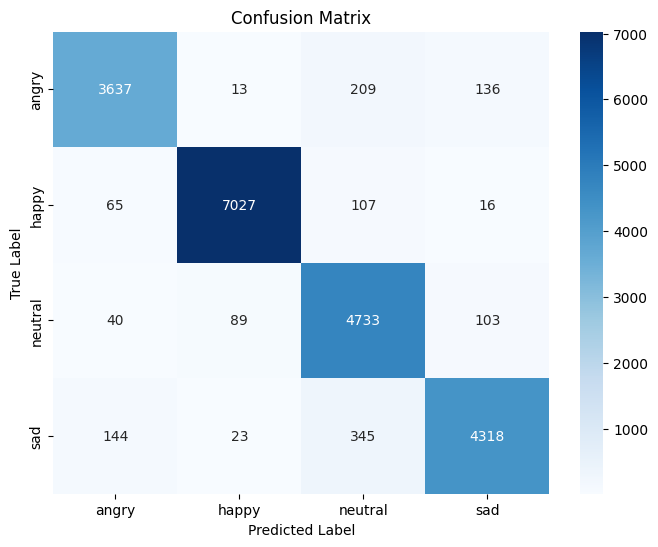

Classification Report:
              precision    recall  f1-score   support

       angry       0.94      0.91      0.92      3995
       happy       0.98      0.97      0.98      7215
     neutral       0.88      0.95      0.91      4965
         sad       0.94      0.89      0.92      4830

    accuracy                           0.94     21005
   macro avg       0.94      0.93      0.93     21005
weighted avg       0.94      0.94      0.94     21005



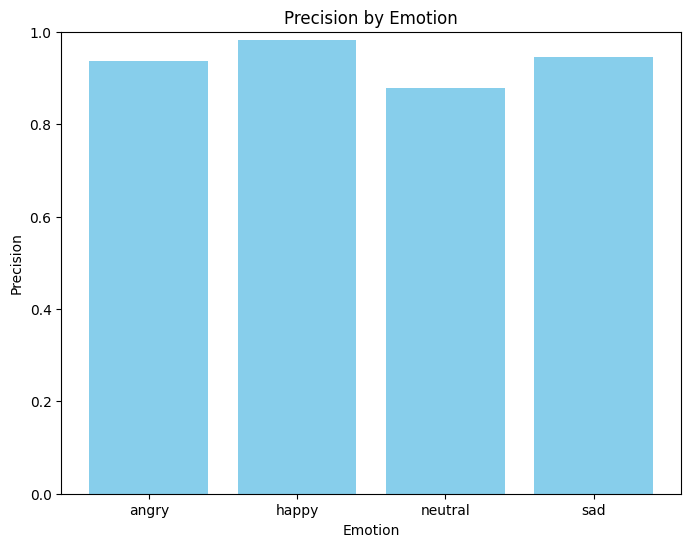

Overall Accuracy: 0.9385860509402523


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate confusion matrix
conf_mat = confusion_matrix(Y, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(Y, y_pred_classes, target_names=classes))

# Calculate accuracy by emotion
precision_scores = []
for emotion in range(len(classes)):
    precision_scores.append(conf_mat[emotion, emotion] / np.sum(conf_mat[:, emotion]))

# Plot accuracy by emotion
plt.figure(figsize=(8, 6))
plt.bar(classes, precision_scores, color='skyblue')
plt.title('Precision by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Limit y-axis to range [0, 1]
plt.show()

# Plot overall accuracy
overall_accuracy = accuracy_score(Y, y_pred_classes)
print("Overall Accuracy:", overall_accuracy)
